<a href="https://colab.research.google.com/github/Bani-Talebi/Electricity-Price-Value-at-Risk-VaR-/blob/master/Volatility_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

up=files.upload()



Saving Markets.csv to Markets.csv


In [ ]:
df=pd.read_csv('Markets.csv')
df.index=pd.date_range(start='2019-01-01',periods=len(df),freq='H')
df.drop(columns=['Date','Hour'],inplace=True)
df=df.iloc[:-1]
df

,Ontario,PJM,Nord
2019-01-01 00:00:00,0.00,18.98,44.55
2019-01-01 01:00:00,0.00,18.81,44.07
2019-01-01 02:00:00,-0.11,18.59,41.12
2019-01-01 03:00:00,-1.84,18.42,38.88
2019-01-01 04:00:00,-0.47,18.58,35.70
...,...,...,...
2019-12-31 19:00:00,0.00,25.24,34.78
2019-12-31 20:00:00,0.00,23.20,33.30
2019-12-31 21:00:00,-0.05,21.32,32.30
2019-12-31 22:00:00,-0.04,19.21,32.17


In [ ]:
Y=df['Ontario'].values.reshape(365,24)
Vol_Ontario=np.zeros(24)
for i in range(24):
  p=Y[:,i]
  r=p[1:]-p[:-1]
  r_bar=r.mean()
  x1=r-r_bar
  x2=np.sign(x1)
  rho=np.corrcoef(x1,x2)[0,1]
  s=np.abs(x1)/rho
  Vol_Ontario[i]=s.mean()
Y=df['PJM'].values.reshape(365,24)
Vol_PJM=np.zeros(24)
for i in range(24):
  p=Y[:,i]
  r=p[1:]-p[:-1]
  r_bar=r.mean()
  x1=r-r_bar
  x2=np.sign(x1)
  rho=np.corrcoef(x1,x2)[0,1]
  s=np.abs(x1)/rho
  Vol_PJM[i]=s.mean()

Y=df['Nord'].values.reshape(365,24)
Vol_Nord=np.zeros(24)
for i in range(24):
  p=Y[:,i]
  r=p[1:]-p[:-1]
  r_bar=r.mean()
  x1=r-r_bar
  x2=np.sign(x1)
  rho=np.corrcoef(x1,x2)[0,1]
  s=np.abs(x1)/rho
  Vol_Nord[i]=s.mean()

Text(0, 0.5, 'Volatility')

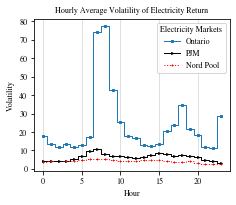

In [ ]:


x=np.arange(0,24)
plt.figure(figsize=(3.5,2.8))
plt.rcParams['font.family']='STIXGeneral'
plt.rcParams['font.size']=8
plt.rcParams['figure.autolayout']=True
plt.rcParams['axes.titlesize']=8
plt.rcParams['axes.labelsize']=8
plt.rcParams['lines.linewidth']=1
plt.rcParams['lines.markersize']=2
plt.rcParams['legend.fontsize']=8
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['mathtext.fontset']='custom'
plt.rcParams['legend.numpoints']=1

plt.step(x, Vol_Ontario, where='mid', label='Ontario',ls='-',marker='s')
#plt.plot(x, Vol_Ontario, ls='steps',color='red' ,label='Ontario')

plt.step(x, Vol_PJM, where='mid', label='PJM',color='black',ls='-',marker='>')
#plt.plot(x, Vol_PJM, '>--', color='red', alpha=0.3)

plt.step(x, Vol_Nord, where='mid', label='Nord Pool',color='red',ls=':',marker='+')
#plt.plot(x, Vol_Nord, '>--', color='red', alpha=0.3)

plt.grid(axis='x', color='0.85')
plt.legend(title='Electricity Markets')
plt.title('Hourly Average Volatility of Electricity Return')
plt.xlabel('Hour')
plt.ylabel('Volatility')
#plt.savefig('Volatility.pdf',dpi=300)
#files.download('Volatility.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

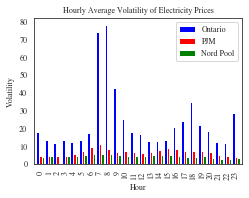

In [ ]:
import seaborn as sns
sns.set_style('white')
plt.rcParams['font.family']='STIXGeneral'
plt.rcParams['font.size']=8
plt.rcParams['figure.autolayout']=True
plt.rcParams['axes.titlesize']=8
plt.rcParams['axes.labelsize']=8
plt.rcParams['lines.linewidth']=1
plt.rcParams['lines.markersize']=2
plt.rcParams['legend.fontsize']=8
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['mathtext.fontset']='custom'
plt.rcParams['legend.numpoints']=1
hour=np.arange(0,24)
Vol_DF=pd.DataFrame({'Hour':hour,'Ontario':Vol_Ontario,'PJM':Vol_PJM,'Nord Pool':Vol_Nord})
Vol_DF.index=Vol_DF.Hour
Vol_DF.drop(columns='Hour',inplace=True)
Vol_DF.plot.bar(color={'Ontario':'blue','PJM':'red','Nord Pool':'green'},figsize=(3.5,2.8),width=0.9)
plt.ylabel('Volatility')
plt.title('Hourly Average Volatility of Electricity Prices')
plt.savefig('Volatility.png',dpi=300)
files.download('Volatility.png')

In [ ]:
import matplotlib
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [ ]:
Vol=np.zeros([52,24])
R=np.zeros([6,24])
for w in range(52):
  W=df['Ontario'].iloc[w*168:(w+1)*168].values
  W=W.reshape(7,24)
  for i in range(6):
    R[i,:]=W[i+1,:]-W[i,:]
  for j in range(24):
    Vol[w,j]=R[:,j].std()
sigma_Ontario=np.zeros(24)
for l in range(len(sigma_Ontario)):
  sigma_Ontario[l]=Vol[:,l].mean()

for w in range(52):
  W=df['PJM'].iloc[w*168:(w+1)*168].values
  W=W.reshape(7,24)
  for i in range(6):
    R[i,:]=W[i+1,:]-W[i,:]
  for j in range(24):
    Vol[w,j]=R[:,j].std()
sigma_PJM=np.zeros(24)
for l in range(len(sigma_PJM)):
  sigma_PJM[l]=Vol[:,l].mean()

Text(0.5, 1.0, 'Hourly Average Volatility of Electricity Return')

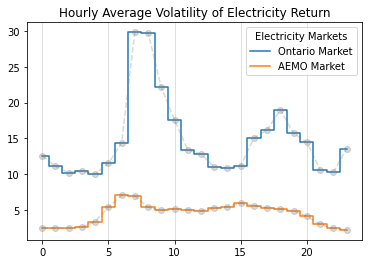

In [ ]:
x=np.arange(0,24)

plt.step(x, sigma_Ontario, where='mid', label='Ontario Market')
plt.plot(x, sigma_Ontario, 'o--', color='grey', alpha=0.3)

plt.step(x, sigma_PJM, where='mid', label='AEMO Market')
plt.plot(x, sigma_PJM, 'o--', color='grey', alpha=0.3)

plt.grid(axis='x', color='0.85')
plt.legend(title='Electricity Markets')
plt.title('Hourly Average Volatility of Electricity Return')